In [2]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from scipy.stats import vonmises
%matplotlib inline

# Resolution (in number of points) to calculate everything with (i.e 100 would compute 100 different orientations)
resolution = 100

In [3]:
# array of orientations
o = np.linspace(0,np.pi,resolution)

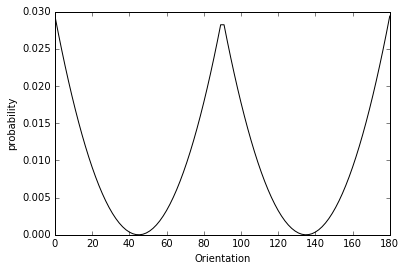

In [4]:
# Make a prior that has troughs near 45 and 135 (i.e. the probability at the cardinal orientations is greatest)
prior = np.fmin(np.power(o-np.pi/4,2),np.power(o-3*np.pi/4,2))
# normalize to 1
prior = prior / np.sum(prior)
# and plot
plt.plot(180*o/np.pi,prior,'k-')
plt.xlabel('Orientation')
plt.ylabel('probability')

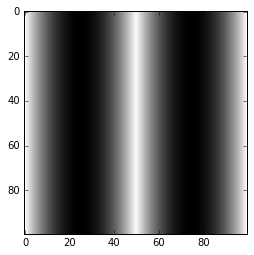

In [5]:
# make into the distribution of figure 2
prior = np.matlib.repmat(prior,resolution,1)
# display it as an image
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(prior,cmap="gray")

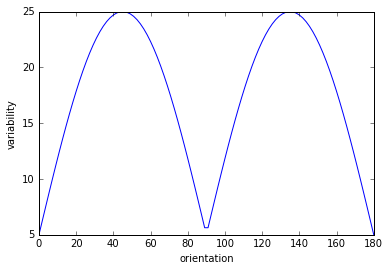

In [6]:
# makeup a function that describes the variability at different orientation
# they use a rectified sinusoid
variability = np.abs(np.sin(2*o))
# make the offset and range - this is a bit arbitrary, just trying to match figure 3
variability = np.radians(5+20*variability)
plt.plot(np.degrees(o),np.degrees(variability))
plt.xlabel('orientation')
plt.ylabel('variability')

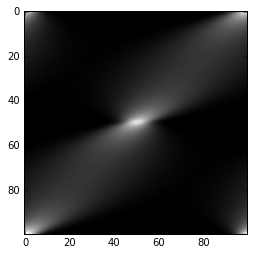

In [7]:
# init measurementDistribution
measurementDistribution = np.zeros((resolution,resolution))
for iOrient in range(len(o)):
    # compute a circular gaussian function with the 
    # likelihood width for each orientation taken from the variability above
    # note that this is ventered at 90 degrees orientation
    thisMeasurementDistribution = np.exp(-(np.power((o-np.pi/2)/2,2))/variability[iOrient]**2)
    # now shift the distribution so that it is centered on the correct orientation
    thisMeasurementDistribution = np.roll(thisMeasurementDistribution,-iOrient+np.int(resolution/2))
    # and normalize to a probability distribution
    thisMeasurementDistribution = thisMeasurementDistribution/np.sum(thisMeasurementDistribution)
    # put it in the right place in the meaurement distribution
    measurementDistribution[iOrient,:] = thisMeasurementDistribution
# and plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(measurementDistribution,cmap="gray")

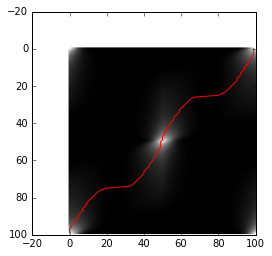

In [13]:
# Now compute the posterior functions
posterior = prior * measurementDistribution
# and get the maximum along each row
map = posterior.argmax(0)
# this just fix a wrap in the array
map[0] = map[1]
# and plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(posterior,cmap="gray")
# plot red point at each maximum a posteriori estimate
plt.plot(map,range(len(o)),'r-')

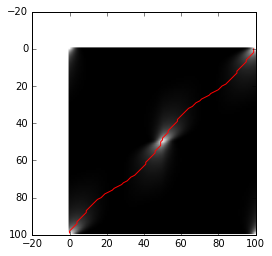

In [19]:
# Now do everything to get a decoder function when the stimulus is easier
# to see, i.e. likelihood is narrow

# first save decoder function
decoderHigh = map

# makeup a function that describes the variability at different orientation
# they use a rectified sinusoid
variability = np.abs(np.sin(2*o))
# make the offset and range - this is a bit arbitrary, just trying to match figure 3
variability = np.radians(3+12*variability)
# init measurementDistribution
measurementDistribution = np.zeros((resolution,resolution))
for iOrient in range(len(o)):
    # compute a circular gaussian function with the 
    # likelihood width for each orientation taken from the variability above
    # note that this is ventered at 90 degrees orientation
    thisMeasurementDistribution = np.exp(-(np.power((o-np.pi/2)/2,2))/variability[iOrient]**2)
    # now shift the distribution so that it is centered on the correct orientation
    thisMeasurementDistribution = np.roll(thisMeasurementDistribution,-iOrient+np.int(resolution/2))
    # and normalize to a probability distribution
    thisMeasurementDistribution = thisMeasurementDistribution/np.sum(thisMeasurementDistribution)
    # put it in the right place in the meaurement distribution
    measurementDistribution[iOrient,:] = thisMeasurementDistribution
# Now compute the posterior functions
posterior = prior * measurementDistribution
# and get the maximum along each row
map = posterior.argmax(0)
# this just fix a wrap in the array
map[0] = map[1]
# and plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(posterior,cmap="gray")
# plot red point at each maximum a posteriori estimate
plt.plot(map,range(len(o)),'r-')
decoderLow = map